Now that we know more about statistical testing, let's go back to our CDC data and use our knowledge to analyze the data. This time however, you are free to analyze any of the survey questions that you find interesting. Below is a list of statistical operations that you must perform for this lab. Each one must be accompanied by a graphic and at least one sentence explaining what you learned from the statistic or the test.  

You must complete the following types statistical operations:
- Create a confidence interval for a sample mean.
- Create a confidence interval for a sample proportion.
- Perform a two-sample test of means.
- Perform a two sample test of proportions.
- Perform a Chi-Square test
- Perform a one-way ANOVA

To reiterate, you will to look at 'PHYSHLTH' or the 'CHRONIC' columns that you previously worked with. You can look at any of the items within this survey.  When choosing which survey questions to analyze have a hypothesis about the question before your performing a test. Also be sure to properly clean your the responses. Finally, try to develop a consistent theme between the survey items you investigate. I.E., the survey item that you create a mean confidence interval for, should be involved in your ANOVA.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

%matplotlib inline

In [113]:
df = pd.read_csv('case_study.csv')

/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [114]:
df.head(10)

,Unnamed: 0,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [115]:
df['MENTHLTH'].isna().any()

False

In [116]:
df['MENTHLTH'].value_counts(dropna=False)

88.0    23119
30.0     1814
2.0      1681
5.0      1224
1.0      1084
3.0      1007
10.0      902
15.0      753
20.0      489
4.0       472
7.0       470
77.0      373
99.0      280
25.0      174
14.0      161
6.0       144
8.0        93
12.0       70
28.0       45
21.0       37
29.0       24
18.0       20
13.0       18
9.0        15
16.0       14
24.0       12
27.0       12
17.0       12
22.0        9
23.0        7
26.0        5
19.0        3
11.0        2
Name: MENTHLTH, dtype: int64

In [117]:
zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['MENTHLTH'] = df['MENTHLTH'].replace(zero_dict)

In [39]:
zero_dict = {1: 'yes',
             2: 'no',
             7: np.nan,
             9: np.nan}
    
df['ADDEPEV2'] = df['ADDEPEV2'].replace(zero_dict)

In [118]:
zero_dict2 = {1: 'Winter',
             2: 'Winter',
             3: 'Winter',
             4: 'Spring',
             5: 'Spring',
             6: 'Spring',
             7: 'Summer',
             8: 'Summer',
             9: 'Summer',
             10: 'Fall',
             11: 'Fall',
             12: 'Fall'}
df['FMONTH'] = df['FMONTH'].replace(zero_dict2)
seasons = df['FMONTH'].value_counts(dropna=False, normalize=True)
seasons

Fall      0.317817
Summer    0.254624
Winter    0.220408
Spring    0.207150
Name: FMONTH, dtype: float64

In [119]:
winter = np.array(seasons)[0]
spring = np.array(seasons)[1]
summer = np.array(seasons)[2]
fall = np.array(seasons)[3]

In [120]:
winter, spring, summer, fall

(0.3178173397018382,
 0.2546244029526704,
 0.22040816326530613,
 0.20715009408018525)

In [121]:
df.SEX.value_counts(dropna=True, normalize=True)

2.0    0.560602
1.0    0.438790
9.0    0.000608
Name: SEX, dtype: float64

In [122]:
df['CHRON_MENT'] = np.where(df['MENTHLTH']>=25, 1,0)

In [135]:
m_chron = df.CHRON_MENT
prop = m_chron.value_counts(normalize=True)
prop

0    0.938806
1    0.061194
Name: CHRON_MENT, dtype: float64

In [138]:
health = prop[0]
chron = prop[1]
health, chron

(0.9388056178449191, 0.06119438215508084)

In [124]:
df.dropna(subset=['MENTHLTH'], inplace=True)

In [125]:
ment = df['MENTHLTH']

In [126]:
ment.describe()

count    33892.000000
mean         3.464003
std          7.755965
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: MENTHLTH, dtype: float64

In [127]:
ment.value_counts()

0.0     23119
30.0     1814
2.0      1681
5.0      1224
1.0      1084
3.0      1007
10.0      902
15.0      753
20.0      489
4.0       472
7.0       470
25.0      174
14.0      161
6.0       144
8.0        93
12.0       70
28.0       45
21.0       37
29.0       24
18.0       20
13.0       18
9.0        15
16.0       14
17.0       12
27.0       12
24.0       12
22.0        9
23.0        7
26.0        5
19.0        3
11.0        2
Name: MENTHLTH, dtype: int64

## Exercises for Chi/ANOVA and other Distributions

**Confidence Interval for a sample mean:**

In [128]:
ment_mu = ment.mean()
ment_mu

3.4640033046146583

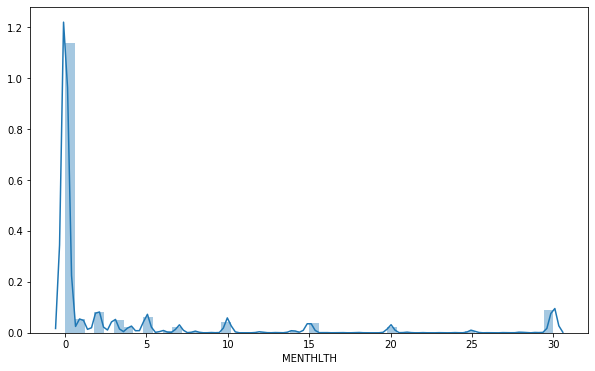

In [129]:
plt.figure(figsize=(10,6))
sns.distplot(ment)
plt.show()

In [130]:
norm.interval(.95) # critical values for a confidence interval 

(-1.959963984540054, 1.959963984540054)

In [131]:
serr = ment.std()/(len(ment)**.5)
serr

0.04212959308651134

In [132]:
err = 1.96*serr
err

0.08257400244956223

In [133]:
low, high = round(ment_mu - err, 2), round(ment_mu + err, 2)
low, high

(3.38, 3.55)

In [134]:
print('Confidence Interval at 95%:   ', low, '-', high)

Confidence Interval at 95%:    3.38 - 3.55


**The confidence interval at 95% for the population mean is 3.38 - 3.55.**

In [143]:
n = len(m_chron)
n

33892

In [145]:
serr = (health*chron/n)**.5
serr

0.0013019521351876515

In [146]:
norm.interval(.95)

(-1.959963984540054, 1.959963984540054)

In [147]:
err = 1.96*(serr)
err

0.002551826184967797

In [148]:
low, high = chron - serr, chron + serr
low, high

(0.05989243001989319, 0.0624963342902685)

**The 95% confidence interval for the proportion of the population that is chronically mentally ill is .0599 - 0625.**

# ANOVA - Analysis of Variance
Today, we will be learning ANOVA, a generalized form of comparing mean across multiple groups. 
Agenda today:
- Compare t-tests and ANOVA
- Learn to calculate ANOVA & details 
- Implement ANOVA in python
    - using statsmodel


## Part I. T tests or ANOVA?
**ANOVA** or *Analysis Of Variance*  provides a statistical test of whether two or more population means are equal, and therefore generalizes the t-test beyond two means.

Suppose we want to compare whether multiple groups differ in some type of measures. For example, we have collected mood data grouped by four types of weather - sunny, raining, overcast, or cloudy, and we want to find out whether there is a difference in mood across different weather. What tests would you use?

A natural reaction would be to conduct multiple t-tests. However, that comes with many drawbacks. First, you would need $\frac{n(n-1)}{2}$ t tests, which come out to 6 tests. Having more tests meaning having higher chance of making type I error. In this case, our original probability of making type I error grew from 5% to 5% x 6 = 30%! By conduct 6 tests and comparing their mean to each other, we are running a huge risk of making false positives. How then, can we combat this? -- ANOVA!

Instead of looking at each individual difference, ANOVA examines the ratio of variance between groups, and variance within groups, and find out whether the ratio is big enough to be statistically significant. 

#### T Test statistics 
$t = \frac{x\bar - \mu}{\frac{s}{\sqrt n}}$


We can also say that t test is a special case of ANOVA in that we are comparing the means of only two groups.


#### ANOVA - the F test
$F = \frac{MS_{bet}}{MS_{within}}$

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image046.png" width="500">

#### Between Group Variability

Measures how much the means of each group vary from the mean of the overall population



<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image0171.png" width="500">
    

#### Within Group Variability

Refers to variations caused by differences within individual groups.  

Consider the given distributions of three samples below. As the spread (variability) of each sample is increased, their distributions overlap and they become part of a big population.
<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image031.png" width="500">

Now consider another distribution of the same three samples but with less variability. Although the means of samples are similar to the samples in the above image, they seem to belong to different populations.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image033.png" width="500">


## Part II. Calculating ANOVA 
In this section, we will learn how to calculate ANOVA without using any pacakges. All we need to calculate is:

- $SS_b$ = $n\sum(\bar X - \bar X_i)^2 $

- $SS_w$ = $\sum (n_i - 1) s_i ^ 2$

- $SS_t$ = $\sum (X_ij - \bar X)^2$

- $MS_b$ = $\frac{SS_b}{DF_b}$

- $MS_w$ = $\frac{SS_w}{DF_w}$

- $F$ = $\frac{MS_b}{MS_w}$

Degrees of Freedom for ANOVA:
-  $DF_{between}$ = k - 1
- $DF_{within}$ = N - k
- $DF_{total}$ = N - 1

Notations:
- k is the number of groups
- N is the total number of observations
- n is the number of observations in each group

Like regression and t-test, we can also perform hypothesis testing with ANOVA. 

- $H_0$ : $\mu{_1}$ = $\mu_1$ = $\mu_3$ = $\mu_4$
- $H_a$ : $H_0$ is not true

Under the null hypothesis (and with certain assumptions), both quantities estimate the variance of the random error, and thus the ratio should be close to 1. If the ratio is large, then we have evidence against the null, and hence, we would reject the null hypothesis.

In [15]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
data = pd.read_csv('bikeshare_day.csv')
data.head()
# cnt is the outcome we are trying to predict

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


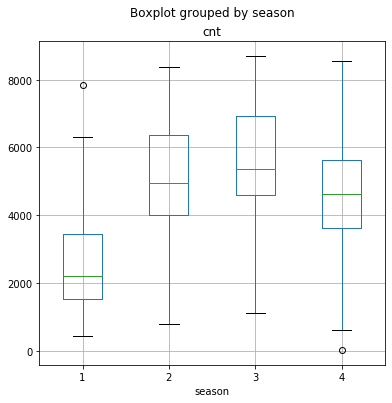

In [16]:
#Create a boxplot
# 1 is spring, 2 is summer, 3 is fall, and 4 is winter
data.boxplot('cnt', by='season', figsize=(6,6))

### 2.2 Calculate ANOVA using statsmodel

In [17]:
# we need to conduct a little bit feature engineering to encode 
data['season_cat'] = data.season.apply(lambda x: 'spring' if x == 1 else ('summer' if x == 2 else ('fall' if x ==3 else 'winter')))

In [18]:
data.season_cat

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
726    spring
727    spring
728    spring
729    spring
730    spring
Name: season_cat, Length: 731, dtype: object

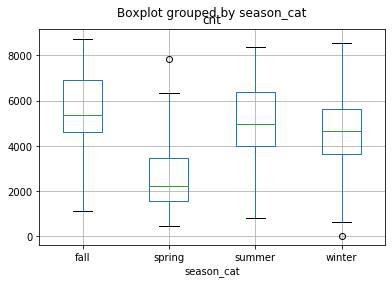

In [19]:
data.boxplot('cnt', by = 'season_cat')

In [20]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# why can we use ols in this case?
anova_season = ols('cnt~season_cat',data=data).fit()
# anova_season.summary()

In [21]:
# examine the anova table 
anova_table = sm.stats.anova_lm(anova_season, type=2)
print(anova_table)

               df        sum_sq       mean_sq           F        PR(>F)
season_cat    3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual    727.0  1.788940e+09  2.460715e+06         NaN           NaN


In [22]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_cat'],
      dtype='object')

## Perform an ANOVA with scipy

In [23]:
stats.f_oneway(data['cnt'][data['season_cat'] == 'summer'],
                data['cnt'][data['season_cat'] == 'fall'], 
                data['cnt'][data['season_cat'] == 'winter'],
                data['cnt'][data['season_cat'] == 'spring'])

F_onewayResult(statistic=128.76962156570784, pvalue=6.720391362913176e-67)

#### Next steps
Just because we have rejected the null hypothesis, it doesn't mean we have conclusively showed which group is significantly different from which - remember, the alternative hypothesis is "the null is not true". 

We need to conduct post hoc tests for multiple comparison to find out which groups are different, the most prominent post hoc tests are:
- LSD (Least significant difference)
    - $t\sqrt \frac{MSE}{n^2}$
- Tukey's HSD 
    - $q\sqrt \frac{MSE}{n}$
    
After calculating a value for LSD or HSD, we compare each pair wise mean difference with the LSD or HSD difference. If the pairwise mean difference exceeds the LSD/HSD, then they are significantly different.

## Two-Way ANOVA:
Using one-way ANOVA, we found out that the season was impactful on the mood of different people. What if the season was to affect different groups of people differently? Say maybe older people were affected more by the seasons than younger people.

Moreover, how can we be sure as to which factor(s) is affecting the mood more? Maybe the age group is a more dominant factor responsible for a person's mode than the season.

For such cases, when the outcome or dependent variable (in our case the test scores) is affected by two independent variables/factors we use a slightly modified technique called two-way ANOVA.

### Resources

https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/
    
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/before-you-start/overview/

### $\chi^2$ Test with scipy

In [24]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [25]:
# contingency table
table = [	[10, 20, 30],
			[6,  9,  17]]
print(table)

[[10, 20, 30], [6, 9, 17]]


In [26]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


In [27]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

In [28]:
critical

5.991464547107979

In [29]:
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)


In [30]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.873
Independent (fail to reject H0)


### Looking back at our bike share data. Can you identify an opportunity to use a chi-squared test?

In [31]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,spring


In [32]:
import numpy as np

In [33]:
data['fake_bin'] = np.where(data['temp'] > .2, 1, 0)

In [34]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat,fake_bin
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,spring,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,spring,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,spring,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,spring,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,spring,1
